# Introducció a Tensorflow/Keras

**Assignatura**: Intel·ligència artificial 

**Professor** : Ramon Mateo Navarro & Edison Jair Bejarano Sepulveda

En aquest notebook farem una introducció a Tensorflow/keras. Aprendrem les bases per crear la nostra primera xarxa neuronal fent servir el dataset MNIST.

## Imports

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras import layers




## Carrega i exploració de les dades

Farem la càrrega primer de les dades i les explorarem per veure que tenim abans de començar a configurar la nostra xarxa neuronal.

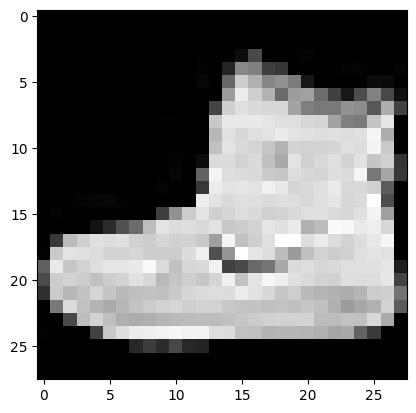

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [16]:
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()
labels = ['Playera', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Tenis', 'Bolso', 'Botas']
plt.imshow(train_images[0], cmap='gray')
plt.show()
print(train_images[0])
print(train_images.shape)

A la cel·la anterior hem mostrat:

1. Primer l'imatge per veure quin aspecte tenen les nostres imatges.
2. La matriu de l'imatge per veure com aquesta és codificada. Observem que està en valors de 0 a 255. 

Una bona pràctictica és normalitza els valors.

**Nota**: Normalitzar els valors significa ajustar els valors d'una variable o conjunt de variables perquè estiguin en una escala específica o rang. Això implica transformar els valors d'entrada perquè estiguin centrats al voltant de zero i tinguin una desviació estàndard d'aproximadament un.

En el context de l'aprenentatge automàtic, normalitzar les dades és una pràctica comuna per millorar el rendiment del model. Aquest procés ajuda a evitar que les característiques amb rangs molt diferents dominin l'entrenament del model, i fa que l'entrenament sigui més estable i convergeixi més ràpidament. A més, molts algoritmes d'aprenentatge automàtic funcionen millor quan les dades estan normalitzades. 

### Normalització de les dades

In [17]:
train_images = train_images / 255
test_images =  test_images / 255

values, count = np.unique(train_images, return_counts=True)
values

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

## Creació del model

Nosaltres el que farem per aquesta pràctica és un model sequencial. Això vol dir que tindrem una capa rere altre. 

En aquest exercici, farem servir xarxes neuronals per processar una imatge. Cal tenir present que les xarxes neuronals no estan dissenyades per a imatges que son vectors de 2 dimensions, si no més bé d'una dimensió, així que el primer pas és aplanar-les, convertint-les en un vector d'una sola dimensió.

**Nota**: Les xarxes expertes en imatge són les xarxes neuronals convolucionals o CNN per les seves sigles en anglès.

In [18]:
model = Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

C:\Users\mariodm1\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Cridant la funció "summary" del model, puc observar tots els paràmetres que té i tindrà el model juntament amb les seves capes. Cada paràmetre consisteix en valors que han de ser entrenats i descoberts per tal d'assolir l'objectiu de classificar correctament.

Ara toca compilar el model. Aquí definirem la funció de pèrdua. El optimitzador i les mètriques que volem veure i calcular durant l'entrenament.

Per declarar l'optimitzador i les funcions de perdua tenim dues formes de fer-ho que es mostren a continuació.







### Opció 1: Indicant amb string

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


En aquesta versió l'optimitzador i la funció de pèrdua s'especifica com a string. És a dir escrivim quin volem. 

Per a més informació sobre els optimitzadors i strings acceptats consulteu:
* [Funció compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)
* [Funcions de pèrdua](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
* [Optimitzadors](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

### Opció 2: Passant com a objectes



In [20]:
## Exemples: 
adam_optimizer = keras.optimizers.Adam(learning_rate=0.001)
# or
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy',])


Aquesta opció ofereix més personalització. Cal recordar que un optimitzador té com a paràmetres la taxa d'aprenentatge, entre altres. Si cridem l'objecte, podem modificar aquest paràmetre, entre molts altres. El mateix passa amb la funció de pèrdua, la qual ens permet ajustar valors concrets. Fent servir l'opció 1, s'assignen uns valors per defecte. Amb aquesta opció, guanyem la capacitat de modificar-los i, per tant, tenim més control sobre com s'està entrenant el nostre model.


## Entrenant el model

Per entrenar el model únicament cal cridar a la funció "fit". Aquesta rep com a paràmetres la X i la Y, més endavant estudiarem altres paràmetres d'entrada que podem afegir per personalitzar encara més el nostre entrenament. 

La funció "fit" retorna un historial de l'evolució per cada epoca de l'entrenament i les mètriques que nosaltres li haguem indicat. 

In [21]:

mdl_fit = model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - accuracy: 0.7798 - loss: 0.6290
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 854us/step - accuracy: 0.8598 - loss: 0.3889
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 837us/step - accuracy: 0.8776 - loss: 0.3391
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - accuracy: 0.8839 - loss: 0.3160
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - accuracy: 0.8903 - loss: 0.2966
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - accuracy: 0.8944 - loss: 0.2832
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 837us/step - accuracy: 0.8991 - loss: 0.2676
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.9048 - loss: 0.2566
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - accuracy: 0.9095 - loss: 0.2434
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 842us/step - accuracy: 0.9106 - loss: 0.2391


## Evaluant l'entrenament

Gràcies a haver guardat l'entrenament ara podem observar en més deteniment com ha evolucionat el nostre entrenament i procedir ajustar el model. Per fer-ho es plotejan les dades de l'evolució de la funció de perdua i la precisió

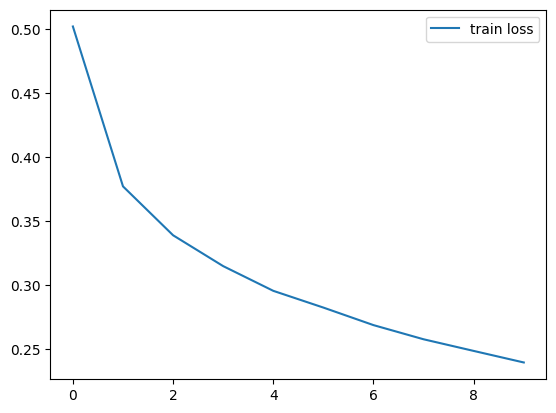

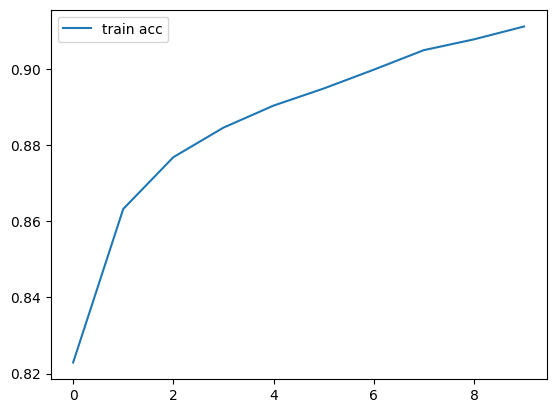

In [22]:
plt.plot(mdl_fit.history['loss'], label='train loss')
plt.legend()
plt.show()
# plot the accuracy
plt.plot(mdl_fit.history['accuracy'], label='train acc')
plt.legend()
plt.show()

**Què en podem extreure d'aquí?**

És possible que observeu com en l'última època no s'ha aconseguit la màxima precisió ni el mínim en la funció de pèrdua. En realitat, els mínims en la funció de pèrdua i els màxims de precisió podrien haver-se trobat en èpoques anteriors, però com el model no ha estat configurat per guardar-ho, només mantindrà la darrera època.

En la següent classe veurem com arreglar aquest petit problema afegint els "callbacks" entre altres funcions i paràmetres que permetran configurar encara més l'entrenament del nostre model.

## Evaluant el model

Ara podem avaluar el model. Per fer-ho, passem les imatges que hem reservat per a les proves. És important recordar que aquestes imatges no han estat utilitzades durant l'entrenament del model, per tant, amb això podrem avaluar quan de bé funciona el model.






In [23]:
model.evaluate(test_images, test_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.8734 - loss: 0.3699


[0.3594810664653778, 0.8725000023841858]

Si volgues predir una única imatge puc fer el següent:

In [24]:
input_data = np.expand_dims(test_images[0], axis=0)
prediction = model.predict(input_data)
# argmax retorna el index de l'array on es troba el maxim. 
print("El model prediu que l'imatge té el label:", np.argmax(prediction))
print("El label correcte és:", test_labels[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
El model prediu que l'imatge té el label: 9
El label correcte és: 9


Com a exercici proveu d'afegir noves capes, canviar el número d'èpoques del model.

Coses que heu de provar:

* Que passa si entreno el model amb 20 - 50 epochs?
* Recordeu el batch size? Que pasa si el defineixo?

**Nota**: El batch_size es posa com a paràmetre en la funció fit.

In [28]:
# Adding new layers to the model
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Training the model with 50 epochs and a batch size of 32
mdl_fit = model.fit(train_images, train_labels, epochs=50, batch_size=32)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.9147 - loss: 0.2294
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.9169 - loss: 0.2222
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.9187 - loss: 0.2168
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.9230 - loss: 0.2041
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - accuracy: 0.9232 - loss: 0.2036
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.9270 - loss: 0.1976
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - accuracy: 0.9294 - loss: 0.1924
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.9309 - loss: 0.1851
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.9301 - loss: 0.1828
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 863us/step - accuracy: 0.9349 - loss: 0.1761
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 861us/step - accuracy: 0.9365 - loss: 0.1684
Epoch 12

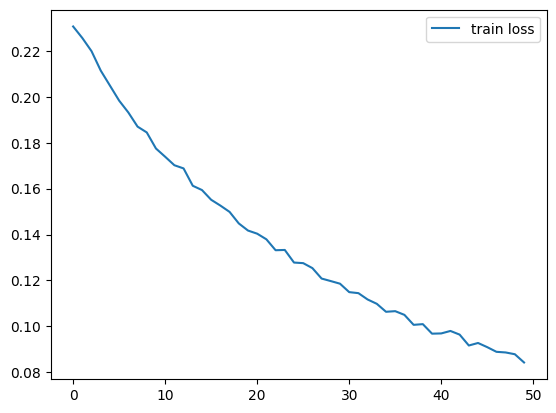

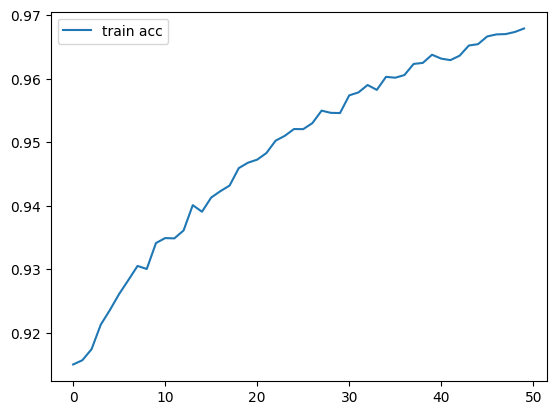

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.8826 - loss: 0.5852
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
El model prediu que l'imatge té el label: 9
El label correcte és: 9


In [29]:
# plot the loss
plt.plot(mdl_fit.history['loss'], label='train loss')
plt.legend()
plt.show()
# plot the accuracy
plt.plot(mdl_fit.history['accuracy'], label='train acc')
plt.legend()
plt.show()

# Evaluating the model
model.evaluate(test_images, test_labels)

# Image prediciton
input_data = np.expand_dims(test_images[0], axis=0)
prediction = model.predict(input_data)
# argmax retorna el index de l'array on es troba el maxim. 
print("El model prediu que l'imatge té el label:", np.argmax(prediction))
print("El label correcte és:", test_labels[0])
